# Introduction to Reinforcement Learning

## Environnement setup

In [1]:
import platform

print(f"Python version: {platform.python_version()}")
assert platform.python_version_tuple() >= ("3", "6")

import numpy as np

print(f"NumPy version: {np.__version__}")

Python version: 3.7.5
NumPy version: 1.18.1


## What is Reinforcement Learning?

### RL in a nutshell

Reinforcement Learning (RL) is about **learning to control dynamic systems**.

The learner (often called an *agent*) is not told explicitly which **actions** to take, but instead must discover which actions yield the most **reward** over time by trying them. 

Actions may affect not only the immediate reward but also the next situation and, through that, all subsequent rewards.

![Learning to ride a bike!](images/prosper_bike.gif)

### A specific subfield of ML

RL is different from **supervised learning**, where correct answers (desired behaviour) are given to the learner during training. A RL learner must be able to learn from its own experience.

RL is also different from **unsupervised learning**: finding structure in unlabeled data could help, but does not solve the reward maximisation problem which is at the heart of RL.

Lastly, RL is different from **evolutionary methods**, which only consider the final outcome and ignore the intermediate steps RL is concerned with.

### The exploration vs. exploitation dilemna

The learner has to exploit what it has already experienced, but it also has to explore in order to discover better actions. Neither exploration nor exploitation can be pursued exclusively without failing at the task at hand.

![](images/exploration_exploitation.png)

### Reinforcement Learning examples

RL can be applied to a wide variety of contexts. To name a few:

- controlling a robot;
- manage a financial portfolio;
- steering a ship;
- playing a game.

### Recent breakthroughs

RL is not a new field but went mainstream in recent years, mostly due to game-related feats:

- [AlphaGo](https://deepmind.com/research/case-studies/alphago-the-story-so-far) beat Go champion Lee Sedol in 2016;
- [AlphaZero](https://deepmind.com/blog/article/alphazero-shedding-new-light-grand-games-chess-shogi-and-go) achieved superhuman level at chess, shogi and go in less than 24 hours in 2017;
- [OpenAI Five](https://openai.com/blog/openai-five/) demonstrated expert level play against other competitive Dota 2 teams in 2019;
- [AlphaStar](https://deepmind.com/blog/article/alphastar-mastering-real-time-strategy-game-starcraft-ii) reached StarCraft 2 Grandmaster level (top 0.2% of human players) also in 2019.

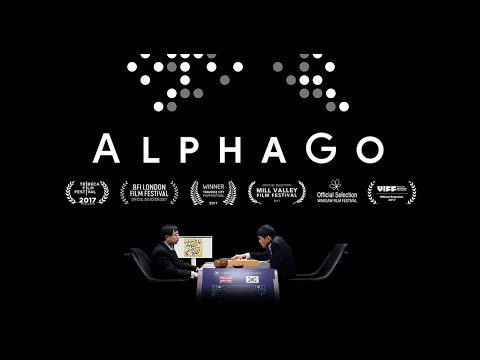

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo("WXuK6gekU1Y")

## Problem formulation

### General abstraction

- $s_t$: observed state of the dynamic system at step $t$.
- $a_t$: action taken by the agent at step $t$ in order to (try to) control the system.
- $r_t$: reward received by the agent at step $t$ (result of $a_{t-1}$).

![](images/rl_schema.png)

### Policy

The algorithm used by the learner to determine its actions is called its **policy**. Policies may be *deterministic* or *stochastic* (involving some randomness).

Formally, a policy $\pi$ is a mapping from states to probabilities of selecting each possible action.

$\pi(a|s)$: probability that the agent will choose the action $a$ when in state $s$.

### Reward

A **reward signal** defines the goal in a RL problem. The learner’s sole objective is to maximize the total reward it receives in the long run. Rewards are its only guidance it gets.

$R_t=r(s,a,s')$: reward received at step $t$ when system goes from state $s$ to state $s'$, given a chosen action $a$.

### Return

It is common to evaluate actions based on the sum of all the rewards that came after them, usually applying a *discount factor* $\gamma \in [0,1]$.

$G_t$: sum of discounted rewards, called **return**.

$$G_t = R_{t+1} + \gamma R_{t+2} +\gamma^2 R_{t+3} + · · · = \sum\limits_{k=0}^\infty \gamma^k R_{t+k+1} = R_{t+1} + \gamma G_{t+1}$$

Usually $0.9<\gamma<0.99$.

### Markov Decision Processes

**Markov Decision Processes** (MDP) provide a mathematical framework for modeling decision making in discrete-time situations where outcomes are partly under the control of a decision maker.

They were first described in the 1950s by Richard Bellman as an extension of (Andrey) **Markov chains**.

The dynamics of a MDP is defined as the probability $p(s',r | s,a)$ of getting state $s'$ and reward $r$ after having selected action $a$ in state $s$.

![](images/mdp_example.png)

In [ ]:
transition_probabilities = [  # shape=[s, a, s']
    [[0.7, 0.3, 0.0], [1.0, 0.0, 0.0], [0.8, 0.2, 0.0]],
    [[0.0, 1.0, 0.0], None, [0.0, 0.0, 1.0]],
    [None, [0.8, 0.1, 0.1], None],
]
rewards = [  # shape=[s, a, s']
    [[+10, 0, 0], [0, 0, 0], [0, 0, 0]],
    [[0, 0, 0], [0, 0, 0], [0, 0, -50]],
    [[0, 0, 0], [+40, 0, 0], [0, 0, 0]],
]
possible_actions = [[0, 1, 2], [0, 2], [1]]

### Value function

Whereas the reward signal indicates what is good in an immediate sense, a **value function** specifies what is good in the long run.

Action choices should be made based on value judgments, seeking actions that bring about states of highest value, not highest reward.

Unfortunately, rewards are basically given directly by the environment, whereas values must be **estimated** and re-estimated from the sequences of observations an agent makes over its entire lifetime.

### State value function

$G^\pi(s)$: long-term gain obtained by applying the actions from policy $\pi$, starting in state $s$.

$$G^\pi(s) = \sum\limits_{k = 0}^\infty \gamma^k R_{t+k+1}$$

$V^\pi(s)$: averaged sum of the returns $G^\pi(s)$ that the agent will get by starting from state $s$ and following $\pi$ thereafter.

$$V^\pi(s) = \mathbb{E} \left[ G^\pi(s) \right] = \mathbb{E}\left( \sum\limits_{t = 0}^\infty \gamma^t R_t \bigg| S_0 = s, \pi \right) = \sum\limits_{a} \pi(a|s) \sum\limits_{s', r}p(s',r | s,a)\left[r + \gamma V^{\pi}(s')\right]$$

### Action-state value function

$Q^\pi(s,a)$: expected return starting from state $s$, taking the action $a$, and thereafter following policy $\pi$.

$$Q^\pi(s,a) = \mathbb{E}\left( \sum\limits_{t=0}^\infty \gamma^t R_t \bigg| S_0 = s, A_0=a, \pi \right)$$

$$Q^\pi(s,a) = \sum\limits_{s', r} p(s',r | s,a) \left[r + \gamma V^{\pi}(s')\right]$$

### Optimality

The optimal policy $\pi^*$ is the one that achieves the biggest reward over the long run.

$$V^{\pi^*}(s) = V^*(s) = \underset{a \in A}{max} \sum\limits_{s', r}p(s',r | s,a)\left[r + \gamma V^*(s')\right]= \underset{a \in A}{max}\;Q^*(s,a)$$

$$Q^{\pi^*}(s,a) = Q^*(s,a) = \sum\limits_{s',r} p(s',r | s,a) \left[r + \gamma\; \underset{a'}{max} \;Q^*(s',a')\right]$$

When the agent is in state $s$, it should choose the action with the highest Q-value for that state.

$$\pi^*(s) = \underset{a \in A}{argmax} \;Q^*(s,a)$$

## Deep RL